<a href="https://colab.research.google.com/github/Divij-Agarwal-42/ascii-gravity-project/blob/main/velocity%2Bvectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import copy

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

from matplotlib import cm
import pandas as pd
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/Dark matter data/Rn_Po_pairs.pkl', 'rb') as pickle_file:
    pairs = pickle.load(pickle_file)

:We have already made a dictionary with Rn-Po possible pairs.

pairs is a dictionary where keys are (i-th bin in distance, j-th bin in time).

> Indented block



In [ ]:
for pair in pairs[(39, 122)]:
    print(pair)

[0, 0, (1104, 1.6529756e+18, -11.87721348, 1.31042564, -21.02165985), (278, 1.65297544e+18, -23.82078552, -41.02836227, -86.87709045)]
[988, 896, (2067, 1.65377327e+18, 22.96104431, -40.30447769, -113.49341583), (1190, 1.65377312e+18, 32.65395355, 37.1105957, -103.70983124)]
[7214, 6447, (58358, 1.66308589e+18, -25.19609451, 26.58063507, -32.39534378), (57527, 1.66308574e+18, 6.73298454, -4.99114656, -96.74430084)]
[11625, 10767, (8113, 1.66799221e+18, -46.30368423, -26.1923275, -78.32787323), (7322, 1.66799205e+18, -32.51626968, 45.55490112, -106.5426712)]
[19318, 18221, (92895, 1.68087572e+18, -35.1301651, -28.36653709, -92.15369415), (91999, 1.68087556e+18, -17.42531395, 48.94018936, -101.25391388)]


pair[2] contains information for Rn while pair[3] contains information for Po.

In [ ]:
for pair in pairs[(39, 122)]:
    print(pair[3])

(278, 1.65297544e+18, -23.82078552, -41.02836227, -86.87709045)
(1190, 1.65377312e+18, 32.65395355, 37.1105957, -103.70983124)
(57527, 1.66308574e+18, 6.73298454, -4.99114656, -96.74430084)
(7322, 1.66799205e+18, -32.51626968, 45.55490112, -106.5426712)
(91999, 1.68087556e+18, -17.42531395, 48.94018936, -101.25391388)


Each array has [('event_number', int), ('time', float), ('x', float), ('y', float), ('z', float)]

In [ ]:
for pair in pairs[(39, 122)]:
    print(pair[3]['time'])

1.6529754408595105e+18
1.653773115114755e+18
1.6630857386741732e+18
1.6679920500323748e+18
1.680875562253054e+18


In [ ]:
# So this means 2px by 2px ?
bin_width = (2,2)

x_interval = (0,170)

#np.round takes in array and gives your rounded array
#bin egdes are like [0, 2, 4, ... 170]
x_bin_edges = np.linspace(x_interval[0], x_interval[1], int(np.round((x_interval[1]-x_interval[0])/bin_width[0]+1)))

#bin_width[0]/2 = 1, is added to every element of array
#bin centers is basically bin array
x_bin_centers = x_bin_edges[0:-1] + bin_width[0]/2

t_interval = (-400,100)
t_bin_edges = np.linspace(t_interval[0], t_interval[1], int(np.round((t_interval[1]-t_interval[0])/bin_width[1]+1)))
t_bin_centers = t_bin_edges[0:-1] + bin_width[1]/2


Lets visualize these pairs.

<ipython-input-81-12bed21ed3af>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = copy.copy(cm.get_cmap('plasma')) # copy the default cmap


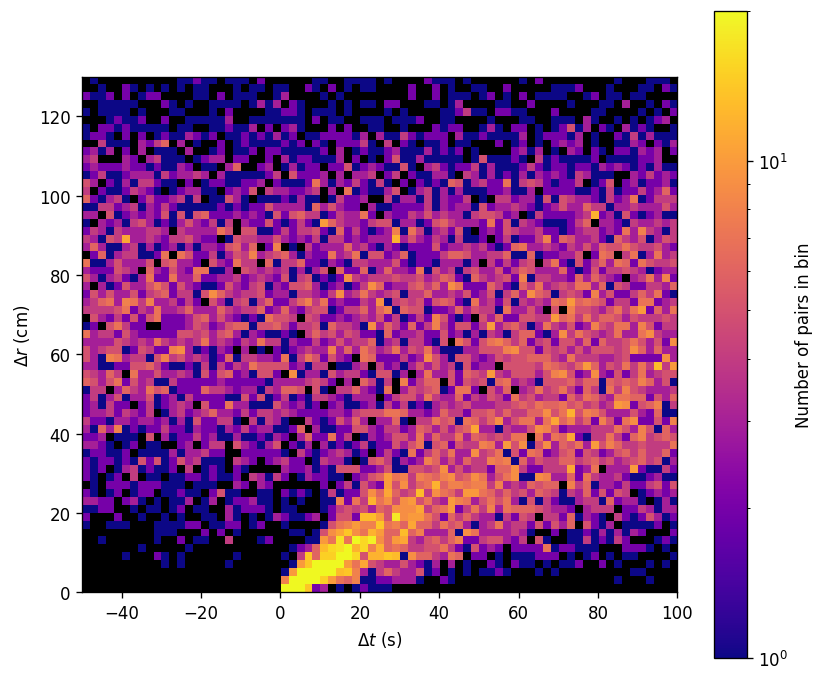

In [ ]:
x_mat,t_mat = np.meshgrid(x_bin_centers,t_bin_centers,indexing='ij')
bin_mat = np.zeros(x_mat.shape)

## pairs are sorted by indices
for key in pairs:
    #print(key)
    bin_mat[key[0],key[1]] = len(pairs[key])
#Basically number of events / bin => length of that pairs[key]

#for colormap
my_cmap = copy.copy(cm.get_cmap('plasma')) # copy the default cmap
my_cmap.set_bad((0,0,0))

#figure initialisation
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)

#Transferring data to an image, bin_mat is the 2d data
i = ax.imshow(bin_mat,origin='lower',extent=(t_interval[0],t_interval[1],x_interval[0],x_interval[1]), norm=LogNorm(vmin=1,vmax = 20,), cmap=my_cmap)

#Setting limits and labels
ax.set(xlim=[-50,100], ylim=[0,130], xlabel=r'$\Delta t$ (s)', ylabel=r'$\Delta r$ (cm)')

#colorbar stuff
c = plt.colorbar(i)
c.set_label('Number of pairs in bin')

plt.show()

You can clearly see the real Rn-Po events above falsely paired Rn-Po events.

### Homework

1. Make cuts in delta-r and

---

delta-t to reject falsely paired Rn-Po events.

2. Create velocity vectors out of these selected pairs.

[link text](https://)3. a. Make 3-d plot of these vectors in x-y-z coordinates.
b. Make plots of projections of vectors in z-y, z-x and y-x coordinates.

plt.quiver() will be useful.

In [ ]:
# Getting a sense of the bins used in the graph above

l1 = []

for i in range(len(pairs.keys())):
  l1.append(list(pairs.keys())[i][0])

print(l1[:10])
l1.sort()

unique_values = set(l1)
print("Basically all y coords: ", unique_values)
print("length", len(unique_values))

l2 = []

for i in range(len(pairs.keys())):
  l2.append(list(pairs.keys())[i][1])
(39, 122)
unique_l2 = set(l2)
print("Basically all x coords: ", unique_l2)
print("length", len(unique_l2))

print(len(l1), len(l2))

[39, 25, 44, 26, 50, 44, 56, 45, 25, 53]
Basically all y coords:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79}
length 79
Basically all x coords:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 1

In [ ]:
#Nbkg calculations

Nbkg_total_events = []

def calc_Nbkg_old(): # Not row / row. Averages out event value for every bin below delta t < 0
  for key in pairs:
    if key[1] < 200:
      Nbkg_total_events.append(len(pairs[key]))

  Nbkg = sum(Nbkg_total_events) / len(Nbkg_total_events)
  return Nbkg

def calc_Nbkg(row):  # For row / row
  Nbkg_total_events = []
  for key in pairs:
    if (170 <= key[1] <= 200) & (key[0] == row): # Shouldn't it be key[1] b/w 170 & 200
      Nbkg_total_events.append(len(pairs[key]))

  if len(Nbkg_total_events) != 0:
    Nbkg = sum(Nbkg_total_events) / 30
  else:
    Nbkg = 0
  return Nbkg

pure_dict = {} # Dictionary with only pure values
Nbkg_by_row = {} # Contains "row" -> "Nbkg"

for row in range(65): # Adding the values to the dictionary that contains Nbkg values for every row
  Nbkg_by_row[row] = calc_Nbkg(row)

In [ ]:
print(calc_Nbkg(1))

0.03333333333333333


In [ ]:
# Calculating purity for each bin

row_purity = []

for key in pairs:
  if (key[1] > 170) & (key[0] < 65):
    Nbin = len(pairs[key])
    Nbkg = Nbkg_by_row[key[0]]
    purity = 1 - (Nbkg / Nbin)
    row_purity.append(purity)

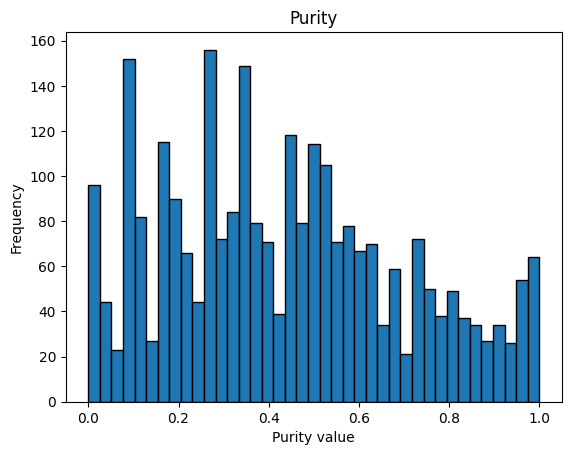

In [ ]:
plt.hist(row_purity, edgecolor = "black", bins = np.linspace(0, 1, 40))
plt.title("Purity")
plt.xlabel("Purity value")
plt.ylabel("Frequency")
plt.show()

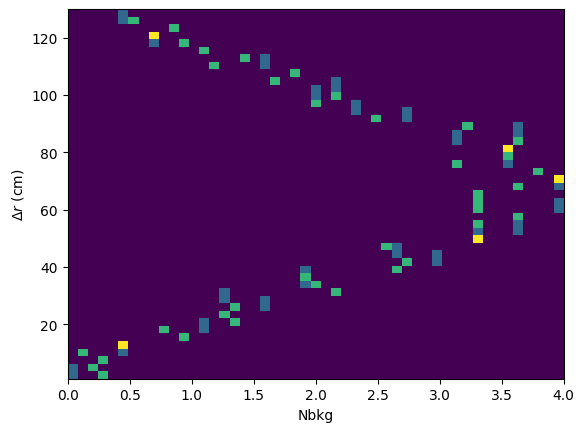

In [ ]:
valid_deltaR = []
Nbkg_by_row_list = []

for row in Nbkg_by_row:
  if row < 65:
    valid_deltaR.append(row*2-1)
    valid_deltaR.append(row*2)
    Nbkg_by_row_list.append(Nbkg_by_row[row])
    Nbkg_by_row_list.append(Nbkg_by_row[row])

plt.hist2d(Nbkg_by_row_list, valid_deltaR, bins = [np.linspace(0, 4, 50), np.linspace(1, 130, 50)])
plt.xlabel("Nbkg")
plt.ylabel("$\Delta r$ (cm)")
plt.show()

<ipython-input-92-4ea1c97a309f>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = copy.copy(cm.get_cmap('plasma')) # copy the default cmap


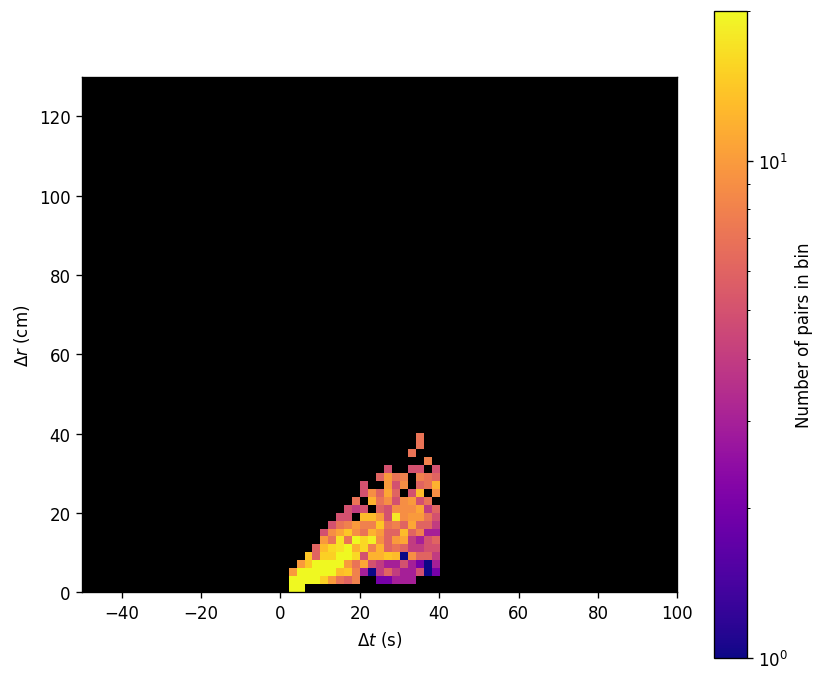

In [ ]:
pure_mat = np.zeros(x_mat.shape)

pure_value = 0.7
triangle1 = 230
triangle2 = 220
triangle3 = 210
slope = 0.8

enable_purity = True
row_purity = []

current_triangle = triangle2

## pairs are sorted by indices
for key in pairs:

  if (200 < key[1] < current_triangle) & (key[1] >= ((slope*key[0])//1 + 200)):
    Nbin = len(pairs[key])
    Nbkg = calc_Nbkg(key[0])
    purity = 1 - (Nbkg / Nbin)

    if (enable_purity):
      if purity > pure_value:
        pure_mat[key[0],key[1]] = len(pairs[key])
        pure_dict[key] = pairs[key]
        row_purity.append(purity)

    else:
        pure_mat[key[0],key[1]] = len(pairs[key])
        pure_dict[key] = pairs[key]
#Basically number of events / bin => length of that pairs[key]

#for colormap
my_cmap = copy.copy(cm.get_cmap('plasma')) # copy the default cmap
my_cmap.set_bad((0,0,0))

#figure initialisation
fig = plt.figure(figsize=(8, 7), dpi=120)
ax = fig.add_subplot(111)

#Transferring data to an image, bin_mat is the 2d data
i = ax.imshow(pure_mat,origin='lower',extent=(t_interval[0],t_interval[1],x_interval[0],x_interval[1]), norm=LogNorm(vmin=1,vmax = 20,), cmap=my_cmap)

#Setting limits and labels
ax.set(xlim=[-50,100], ylim=[0,130], xlabel=r'$\Delta t$ (s)', ylabel=r'$\Delta r$ (cm)')

#colorbar stuff
c = plt.colorbar(i)
c.set_label('Number of pairs in bin')

plt.show()

In [ ]:
delta_t = []
delta_x = []
delta_y = []
delta_z = []

scale= 10**9.8

x1 = []
x2 = []
y1, y2 = [], []
z1, z2 = [], []

for key in pure_dict:
  for pair in pure_dict[key]:
      delta_t = (pair[3]["time"] - pair[2]["time"])
      delta_x = (pair[3]["x"] - pair[2]["x"])
      delta_y = (pair[3]["y"] - pair[2]["y"])
      delta_z = (pair[3]["z"] - pair[2]["z"])

      x1.append(pair[2]["x"])
      x2.append(delta_x / delta_t * scale)

      y1.append(pair[2]["y"])
      y2.append(delta_y / delta_t * scale)

      z1.append(pair[2]["z"])
      z2.append(delta_z / delta_t * scale)

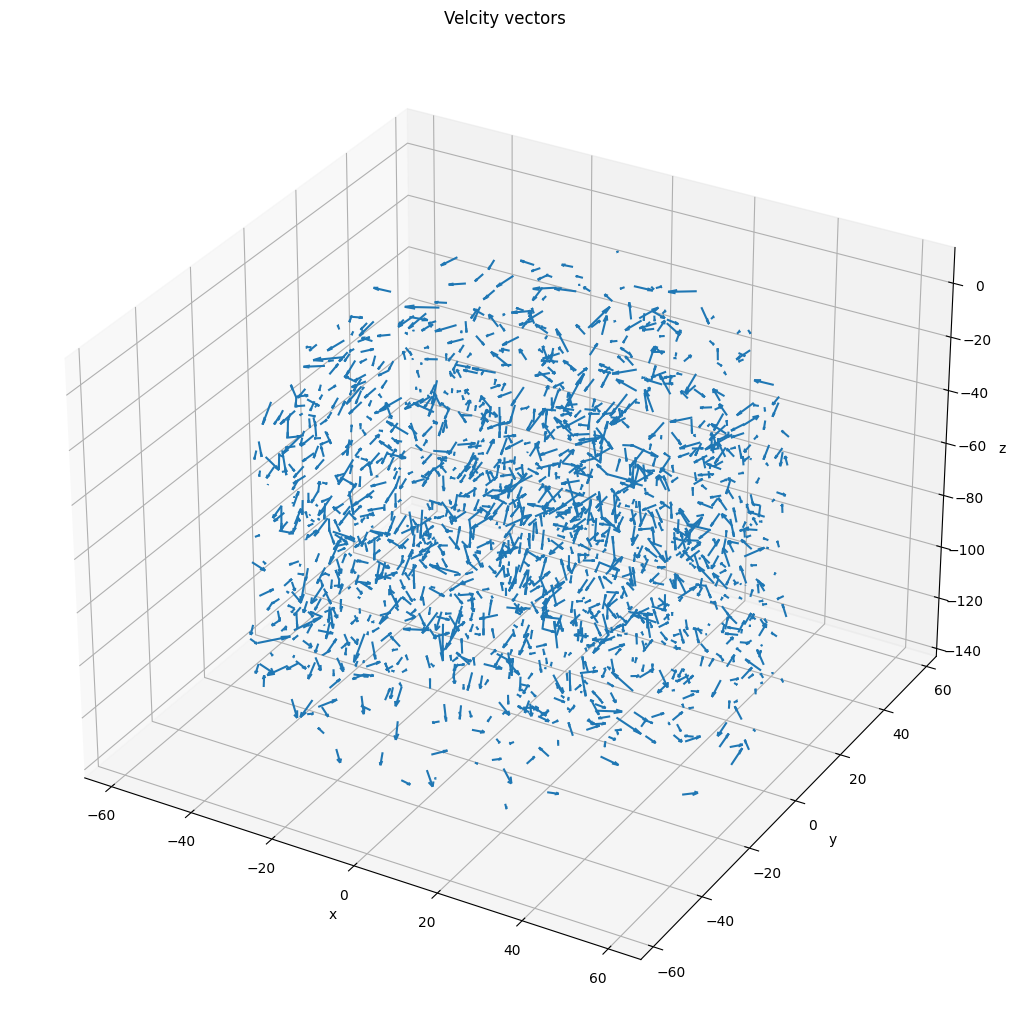

In [ ]:
fig_9 = plt.figure(figsize=(11, 11))
axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9], projection='3d')

lim = 90

axes_9.quiver(x1, y1, z1, x2, y2, z2)
axes_9.set_zlim(-140, 10)
axes_9.set_title("Velcity vectors")
axes_9.set_xlabel("x")
axes_9.set_ylabel("y")
axes_9.set_zlabel("z")

plt.show()

Text(0, 0.5, 'y')

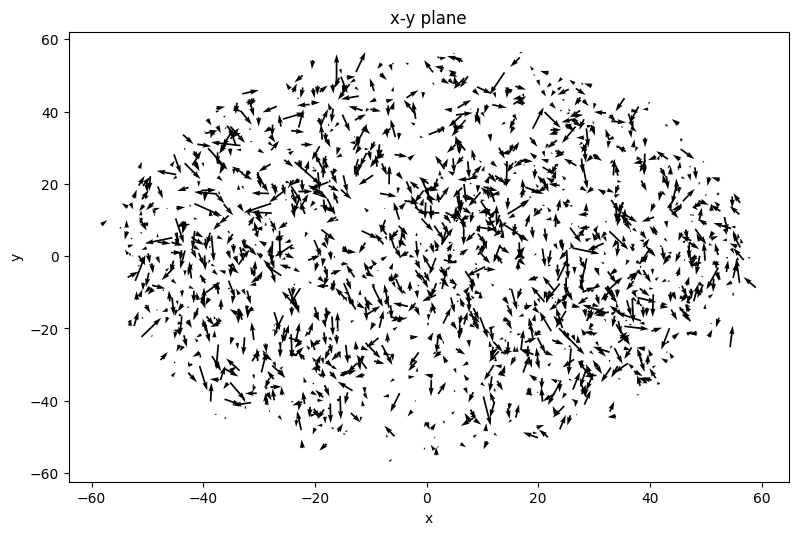

In [ ]:
#y-z

fig_xy = plt.figure(figsize=(8,5))
axes_xy = fig_xy.add_axes([0.1,0.1,0.9,0.9])

axes_xy.quiver(x1, y1, x2, y2)
axes_xy.set_title("x-y plane")
axes_xy.set_xlabel("x")
axes_xy.set_ylabel("y")

Text(0, 0.5, 'z')

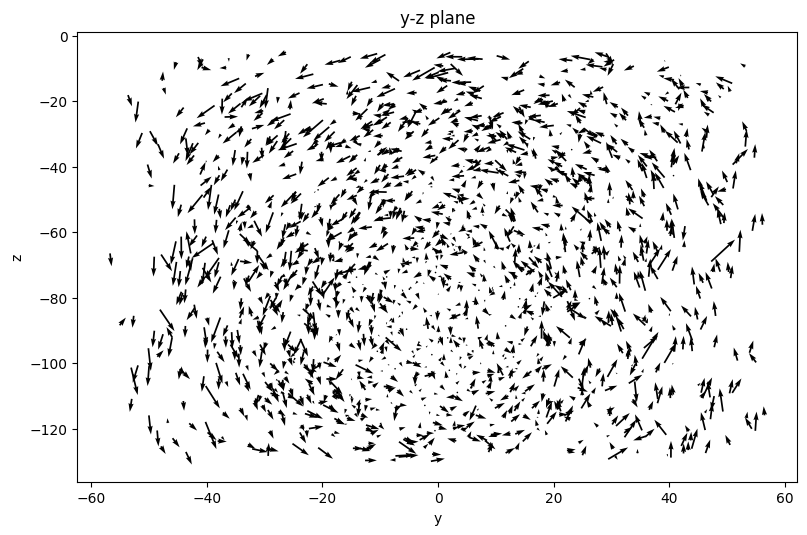

In [ ]:
fig_yz = plt.figure(figsize=(8,5))
axes_yz = fig_yz.add_axes([0.1,0.1,0.9,0.9])

axes_yz.quiver(y1, z1, y2, z2)
axes_yz.set_title("y-z plane")
axes_yz.set_xlabel("y")
axes_yz.set_ylabel("z")

Text(0, 0.5, 'z')

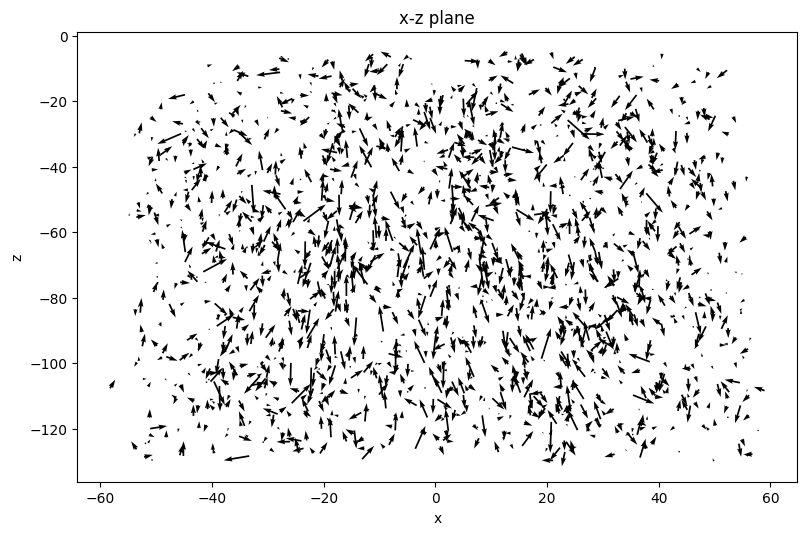

In [ ]:
fig_xz = plt.figure(figsize=(8,5))
axes_xz = fig_xz.add_axes([0.1,0.1,0.9,0.9])

axes_xz.quiver(x1, z1, x2, z2)
axes_xz.set_title("x-z plane")
axes_xz.set_xlabel("x")
axes_xz.set_ylabel("z")